# Personalizing the Covid-19 Pandemic: Defining and Analyzing Personalized Science in U.S. Pandemic News Coverage

##### Claire M. Roney (14649748) 
##### Master’s Thesis Jupyter Lab Notebook
##### University of Amsterdam Graduate School of Communication  
##### Erasmus Mundus Master’s Program in Journalism, Media and Globalization 
##### Dr. K. Katjana Gattermann
##### June 22, 2023

This notebook has been shared to increase transparency and replicability of the thesis research. However, this notebookis considered for viewing only as the dataframe has been removed and the output cleared for analyses containing personal information. This is done to protect the personal information of the scientists analyzed in the study, as well as to comply with GDPR and guidance from the University of Amsterdam. The original coding was preserved wherever possible, and descriptions added to provide more information. 

The thesis is not avialable for reading at this time, but the abstract and hypotheses used for statistical testing are shared below.

## Abstract

The pandemic observed the increasing visibility of obscure scientists in the media, supporting decades-old claims from scholars that the sciences are becoming increasingly mediatized and politicized. However, studies of scientists in the media have not empirically grounded such observations to quantitatively assess if individual visibility is rising more than scientific organizations, institutions and associated generalizations in the media, indicative of media personalization of science. Additionally, studies have not investigated if this visibility is connected to tactics to legitimize or criticize scientists in partisan news coverage, that may present science differently depending on partisan leanings. This study addressed those gaps by asking: how does the visibility and treatment of scientists vary between U.S. partisan news outlets in online pandemic news coverage? This study conceptually defined personalized science in the media, and methodologically contributed an operationalization of personalized science, as well as tactics to legitimize and criticize scientists. This study designed a quantitative content analysis of online pandemic news coverage from politically-opposed media outlets in the United States – CNN and Fox News – incorporating the 2020 U.S. presidential election as a temporal comparison point to assess the visibility and treatment of scientists during the pandemic. The findings implied that in spite of the multidisciplinary observations that scientists are becoming more visible, they may not be so visible as to be personalized by the media. Additionally, partisan online news coverage scored relatively neutral in its treatment of scientists, despite research supporting the polarization and politicization of science by the media. However, post-hoc analyses revealed a significant relationship between visibility and treatment, suggesting the more scientists are personalized in the media, the more they are legitimized and criticized. Findings are discussed, and interpreted with caution, to prompt future research.

## Hypotheses

*Hypothesis 1a: Conservative coverage will have higher centralized visibility of scientists compared to liberal coverage;

*Hypothesis 1b: Liberal coverage will have higher decentralized visibility of scientists compared to conservative coverage.

*Hypothesis 2a: Conservative coverage will criticize more scientists than liberal coverage;
11

*Hypothebasis 2b: Liberal coverage will legitimize more scientists than conservative coverage.

*Hypothesis 3a: Conservative coverage will amplify the criticism of scientists in the post- election period, compared to pre-election coverage;

*Hypothesis 3b: Liberal coverage will increase the legitimization of scientists in the post- election period compared to pre-election coverage.

*Hypothesis 4a: Conservative coverage will have higher decentralized visibility of scientists in post-election coverage compared to pre-election coverage;

*Hypothesis 4b: Liberal coverage will have higher centralized visibility of scientists in post-election coverage compared to pre-election coverage.

## Installing Packages and Cleaning 

### Installations

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install scikit-learn

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr
import re
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Cleaning

In [5]:
#Reading the dataset 

df = pd.read_csv('New Sheet.csv')

In [6]:
# Examining the data types and null data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 87 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unit ID          460 non-null    object 
 1   Outlet           460 non-null    int64  
 2   Headline         460 non-null    object 
 3   Before_AFter     460 non-null    int64  
 4   Article Type     460 non-null    int64  
 5   Generalizations  460 non-null    int64  
 6   Scientists       460 non-null    int64  
 7   s1               305 non-null    object 
 8   sn1              301 non-null    float64
 9   s2               152 non-null    object 
 10  sn2              151 non-null    float64
 11  s3               80 non-null     object 
 12  sn3              80 non-null     float64
 13  s4               41 non-null     object 
 14  sn4              42 non-null     object 
 15  s5               27 non-null     object 
 16  sn5              26 non-null     float64
 17  s6              

In [7]:
# Setting the display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

In [8]:
# Calculating missing values  
missing_values_count = df.isnull().sum().sum()
missing_values_count

31673

In [9]:
# Filling missing values with '0' as this was not a part of the codebook so it can not be conflated with other values.
df = df.fillna('0')

In [10]:
# Checking command was implemented
df.head(10)

In [11]:
# Converting float columns to object data types for categorical variables 
float_columns = ['91', '101', '121', '131', '92', '102', '122', '132', '93', '103', '123', '133', '94', '104', '124', '134', '95', '105', '125', '135', '96', '106', '126', '136', '97', '107', '127', '137', '98', '108', '128', '138', '99', '109', '129', '139', '910', '1010', '1210', '1310']

df[float_columns] = df[float_columns].astype(int).astype(object)

In [12]:
#Defining a lambda function to take out decimal spaces for string > object columns 

clean_float = lambda x: int(str(x).split('.')[0].strip()) if str(x) != '' else 0

df[float_columns] = df[float_columns].applymap(clean_float)

In [13]:
#Removing trailing spaces

df['s1'] = df['s1'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [14]:
df['s2'] = df['s2'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [15]:
df['s3'] = df['s3'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [16]:
df['s4'] = df['s4'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [17]:
df['s5'] = df['s5'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [18]:
df['s6'] = df['s6'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [19]:
df['s7'] = df['s7'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [20]:
df['s8'] = df['s8'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [21]:
df['s9'] = df['s9'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [22]:
df['s10'] = df['s10'].astype(str).apply(lambda x: re.sub(r'\.0+$', '', x.strip()))

In [23]:
# Converting to object columns from string 

df['Outlet'] = df['Outlet'].astype('object')
df['Before_AFter'] = df['Before_AFter'].astype('object')
df['Article Type'] = df['Article Type'].astype('object')

In [24]:
#Confirmed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 87 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unit ID          460 non-null    object
 1   Outlet           460 non-null    object
 2   Headline         460 non-null    object
 3   Before_AFter     460 non-null    object
 4   Article Type     460 non-null    object
 5   Generalizations  460 non-null    int64 
 6   Scientists       460 non-null    int64 
 7   s1               460 non-null    object
 8   sn1              460 non-null    object
 9   s2               460 non-null    object
 10  sn2              460 non-null    object
 11  s3               460 non-null    object
 12  sn3              460 non-null    object
 13  s4               460 non-null    object
 14  sn4              460 non-null    object
 15  s5               460 non-null    object
 16  sn5              460 non-null    object
 17  s6               460 non-null    ob

In [25]:
# Instead of 460 entries, 'sn4' had 459 entries and printing the row located hte missing value at row 114

print(df['sn4'])

0       0
1       0
2       3
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30     17
31      0
32      0
33      0
34      1
35      0
36      3
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      4
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      3
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      1
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      2
94      2
95      0
96      0
97      0
98      2
99      0


In [26]:
# AFter manually reviewing the dataset, confirmed that sn4x114 this was missing in the excel sheet  
column_name = 'sn4'
row_number = 114 

# Using 'at' accessor to replace the value at the specified location with '0'
df.at[row_number, column_name] = 0

In [27]:
# Stripping decimals and trailing spacces before converting object to integer

float2_columns = ['sn1', 'sn2', 'sn3', 'sn4', 'sn5', 'sn6', 'sn7', 'sn8', 'sn9', 'sn10', '111', '141', '112', '142', '113', '143', '114', '144', '115', '145', '116', '146', '117', '147', '118', '148', '119', '149', '1110', '1410']

clean_float = lambda x: int(str(x).split('.')[0].strip()) if str(x) != '' else 0

df[float2_columns] = df[float2_columns].applymap(clean_float)

df[float2_columns] = df[float2_columns].astype(float).astype(int)

In [28]:
#Confirmed 

df.dtypes

Unit ID            object
Outlet             object
Headline           object
Before_AFter       object
Article Type       object
Generalizations     int64
Scientists          int64
s1                 object
sn1                 int64
s2                 object
sn2                 int64
s3                 object
sn3                 int64
s4                 object
sn4                 int64
s5                 object
sn5                 int64
s6                 object
sn6                 int64
s7                 object
sn7                 int64
s8                 object
sn8                 int64
s9                 object
sn9                 int64
s10                object
sn10                int64
91                  int64
101                 int64
111                 int64
121                 int64
131                 int64
141                 int64
92                  int64
102                 int64
112                 int64
122                 int64
132                 int64
142         

### Descriptive Statistics

In [29]:
# Examining

df.head()

In [30]:
# Variable value counts 
df['Article Type'].value_counts()

1    404
3     33
2     23
Name: Article Type, dtype: int64

In [31]:
# Data was spread horizontally, meaning that the cases of the data were articles and the columns represented scientists
# named in the article. This created more than 87 columns of data pertaining to 13 original codebook variables. To 
# attain statistics for the variables, the columns had to be grouped.  

combined_columns = df[['101', '102', '103', '104', '105', '106', '107', '108', '109', '1010']].values.flatten()

value_counts = pd.Series(combined_columns).value_counts()

print(value_counts)

0    4042
4     176
8     136
2     123
7      40
3      39
1      23
9      19
6       2
dtype: int64


In [32]:
# Descriptive statistics for number of scientists  per article

column_name = 'Scientists'

column_values = df[column_name].values

mean = np.mean(column_values)
std = np.std(column_values)

confidence_level = 0.95
degrees_of_freedom = len(column_values) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (std / np.sqrt(len(column_values)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)
0

Mean: 1.4043478260869566
Standard Deviation: 1.6777257538417802
Confidence Interval (95%): (1.2506255440943, 1.5580701080796133)


0

In [33]:
# Descriptive statistics for frequency of generalization mentions per article
column_name = 'Generalizations'

column_values = df[column_name].values

mean = np.mean(column_values)
std = np.std(column_values)

confidence_level = 0.95
degrees_of_freedom = len(column_values) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (std / np.sqrt(len(column_values)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)


Mean: 5.060869565217391
Standard Deviation: 4.187532128929025
Confidence Interval (95%): (4.677185287079259, 5.444553843355524)


In [34]:
# Descriptive statistics for frequency of scientist mentions per article

group_columns = ['sn1', 'sn2', 'sn3', 'sn4', 'sn5', 'sn6', 'sn7', 'sn8', 'sn9', 'sn10']

group_mean = np.mean(df[group_columns].values)
group_std = np.std(df[group_columns].values)

confidence_level = 0.95
degrees_of_freedom = len(df[group_columns]) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (group_std / np.sqrt(len(df[group_columns])))
confidence_interval = (group_mean - margin_of_error, group_mean + margin_of_error)

print("Mean:", group_mean)
print("Standard Deviation:", group_std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)


group_statistics = df[group_columns].describe()

print(group_statistics)

Mean: 0.39565217391304347
Standard Deviation: 1.649104700678408
Confidence Interval (95%): (0.24455230717224297, 0.546752040653844)
              sn1         sn2         sn3         sn4         sn5         sn6  \
count  460.000000  460.000000  460.000000  460.000000  460.000000  460.000000   
mean     2.436957    0.723913    0.323913    0.206522    0.121739    0.093478   
std      4.130014    1.516745    0.833316    0.991665    0.684695    0.754046   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      3.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max     56.000000   15.000000    7.000000   17.000000   11.000000   14.000000   

              sn7         sn8         sn9        sn10  
count  460.000000  460.000000  460.000000  460.000000  
mean     0.030435    0.006

In [35]:
# Descriptive statistics for level of support per article

group_columns = ['111', '112', '113', '114', '115', '116', '117', '118', '119', '1110']

group_mean = np.mean(df[group_columns].values)
group_std = np.std(df[group_columns].values)

confidence_level = 0.95
degrees_of_freedom = len(df[group_columns]) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (group_std / np.sqrt(len(df[group_columns])))
confidence_interval = (group_mean - margin_of_error, group_mean + margin_of_error)

print("Mean:", group_mean)
print("Standard Deviation:", group_std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)

group_statistics = df[group_columns].describe()

print(group_statistics)

Mean: 0.2541304347826087
Standard Deviation: 0.7229049973272287
Confidence Interval (95%): (0.18789398010664565, 0.3203668894585718)
              111         112         113         114         115         116  \
count  460.000000  460.000000  460.000000  460.000000  460.000000  460.000000   
mean     1.213043    0.643478    0.300000    0.152174    0.095652    0.069565   
std      1.155758    1.086188    0.747691    0.550990    0.427261    0.372748   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      2.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
max      4.000000    7.000000    4.000000    4.000000    3.000000    3.000000   

              117         118         119        1110  
count  460.000000  460.000000  460.000000  460.000000  
mean     0.039130    0.01

In [36]:
# Descriptive statistics for level of criticism per article

group_columns = ['141', '142', '143', '144', '145', '146', '147', '148', '149', '1410']

group_mean = np.mean(df[group_columns].values)
group_std = np.std(df[group_columns].values)

confidence_level = 0.95
degrees_of_freedom = len(df[group_columns]) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (group_std / np.sqrt(len(df[group_columns])))
confidence_interval = (group_mean - margin_of_error, group_mean + margin_of_error)

print("Mean:", group_mean)
print("Standard Deviation:", group_std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)

group_statistics = df[group_columns].describe()

print(group_statistics)

Mean: 0.5202173913043479
Standard Deviation: 1.314477891276253
Confidence Interval (95%): (0.3997778375732457, 0.64065694503545)
              141         142         143        144         145         146  \
count  460.000000  460.000000  460.000000  460.00000  460.000000  460.000000   
mean     2.460870    1.226087    0.643478    0.35000    0.232609    0.165217   
std      1.829494    1.781341    1.444342    1.11501    0.933649    0.796839   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      4.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      4.000000    4.000000    0.000000    0.00000    0.000000    0.000000   
max      4.000000    4.000000    4.000000    4.00000    4.000000    4.000000   

              147         148         149        1410  
count  460.000000  460.000000  460.000000  460.000000  
mean     0.071739    0.026087    0.017

In [37]:
# Calculating a cross-tab frequency table for frequency of scientist mentions per outlet 

outlet = df['Outlet'].value_counts().sort_index()
percentage = outlet / len(df) * 100

cumulative_percentage = percentage.cumsum()

outlet_results = pd.DataFrame({
    'Outlet': outlet.index,
    'Frequency': outlet.values,
    'Percentage': percentage.values,
    'Cumulative Percentage': cumulative_percentage.values
})

outlet_results = outlet_results.sort_values('Outlet')

print(outlet_results)

   Outlet  Frequency  Percentage  Cumulative Percentage
0       1        266   57.826087              57.826087
1       2        194   42.173913             100.000000


In [38]:
# Calculating a cross-tab frequency table for articles published before and after election  per outlet 

time = df['Before_AFter'].value_counts().sort_index()
percentage = time / len(df) * 100

cumulative_percentage = percentage.cumsum()

time_results = pd.DataFrame({
    'Outlet': time.index,
    'Frequency': time.values,
    'Percentage': percentage.values,
    'Cumulative Percentage': cumulative_percentage.values
})

time_results = time_results.sort_values('Outlet')

print(time_results)

   Outlet  Frequency  Percentage  Cumulative Percentage
0       1        127   27.608696              27.608696
1       2        333   72.391304             100.000000


## Leaders 

#### Identifying Leaders vs. Non-Leaders

The scientist names were displayed in 10 different columns ['sn#']. I created a new column for each of those 10 that  displayed a '1' if the individual was a leader, or a '0' if the individual was not a leader, based on hte individual having had positions of leadership, public recognition, and a high scientific reputation. Curricula vitae, biographical web pages and other resources were used to assess leadership positions and public recognition. Scientific reputation was measured as the cumulative performance and output of the individual, considered successful if they possessed an h-index score of 20 or above (Hirsch, 2005; Sarli, 2022), procured using the Web of Sciences database.

This section has been heaily modified to protect the perosnal information of the scientists named in pandemic news coverage analyzed for the purposes of this study. Placeholders are frequently used. 

__Citations__

Hirsch, J. E. (2005). An index to quantify an individual’s scientific research output. Proceedings of the National Academy of Sciences, 102(46), 16569–16572. https://doi.org/10.1073/pnas.0507655102

Sarli, C. (n.d.). BeckerGuides: Quantifying the Impact of My Publications: What is the h index? Retrieved June 13, 2023, from https://beckerguides.wustl.edu/c.php?g=299569&p=2001203

In [39]:
# Scientists names were saved to a text file with their corresponding value pair, read by Python and mapped. The output 
# should show the key value pairs in the new dictionary value_mapping, but this output has been removed out of caution.

with open('List.txt', 'r') as file:
    lines = file.readlines()

# empty dictionary to store the name-value pairs
value_mapping = {}

# Iterate over lines in the file
for line in lines:
    # Remove any leading or trailing spaces
    line = line.strip()

    # Split the line into name and value using the colon as the separator
    name, value = line.split(':')

    # Remove the double quotes around the name and strip any leading or trailing spaces
    name = name.strip().strip('"')
    
    # Remove the comma from the value and strip any leading or trailing spaces
    value = value.strip().replace(',', '')

    # Convert the value to an integer and strip any leading or trailing spaces
    value = int(value)

    # Add the name-value pair to the dictionary
    value_mapping[name] = value

# Print the dictionary
print(value_mapping)

In [40]:
# A new, empty column was created that iterated over the rows of [s1] to create [Leader_1] based on key value pairs
# defined in the previous code for the value_mapping dictionary. This was repeated 10 times.

df['Leader_1'] = ""

for i, value in enumerate(df['s1']):
    if value in value_mapping:
        df.at[i, 'Leader_1'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_1'] = "99"
        
df['Leader_1'] = df['Leader_1'].astype(int)

In [41]:
#Repeating the above for each column

df['Leader_2'] = ""

for i, value in enumerate(df['s2']):
    if value in value_mapping:
        df.at[i, 'Leader_2'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_2'] = "99"
        
df['Leader_2'] = df['Leader_2'].astype(int)

In [42]:
df['Leader_3'] = ""

for i, value in enumerate(df['s3']):
    if value in value_mapping:
        df.at[i, 'Leader_3'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_3'] = "99"
        
df['Leader_3'] = df['Leader_3'].astype(int)

In [43]:
df['Leader_4'] = ""

for i, value in enumerate(df['s4']):
    if value in value_mapping:
        df.at[i, 'Leader_4'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_4'] = "99"
        
df['Leader_4'] = df['Leader_4'].astype(int)

In [44]:
df['Leader_5'] = ""

for i, value in enumerate(df['s5']):
    if value in value_mapping:
        df.at[i, 'Leader_5'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_5'] = "99"
        
df['Leader_5'] = df['Leader_5'].astype(int)

In [45]:
df['Leader_6'] = ""

for i, value in enumerate(df['s6']):
    if value in value_mapping:
        df.at[i, 'Leader_6'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_6'] = "99"
        
df['Leader_6'] = df['Leader_6'].astype(int)

In [46]:
df['Leader_7'] = ""

for i, value in enumerate(df['s7']):
    if value in value_mapping:
        df.at[i, 'Leader_7'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_7'] = "99"
        
df['Leader_7'] = df['Leader_7'].astype(int)

In [47]:
df['Leader_8'] = ""

for i, value in enumerate(df['s8']):
    if value in value_mapping:
        df.at[i, 'Leader_8'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_8'] = "99"
        
df['Leader_8'] = df['Leader_8'].astype(int)

In [48]:
df['Leader_9'] = ""

for i, value in enumerate(df['s9']):
    if value in value_mapping:
        df.at[i, 'Leader_9'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_9'] = "99"
        
df['Leader_9'] = df['Leader_9'].astype(int)

In [49]:
df['Leader_10'] = ""

for i, value in enumerate(df['s10']):
    if value in value_mapping:
        df.at[i, 'Leader_10'] = str(value_mapping[value])
    else:
        df.at[i, 'Leader_10'] = "99"
        
df['Leader_10'] = df['Leader_10'].astype(int)

In [50]:
# Confirmed 
df

#### Step 2

The previous steps created 10 new columns that show a '1' if a leader was present in the corresponding 's#' columnns, a '0' for a non-leader and a '99' for absence of any matching key-value pairs logged in value_mapping dictionary (e.g. articles that contained generalizations used for measuring de/centralized visibility, but not scientists). 

Drawing inspiration from Pedersen and Rahat (2021), personalized science in the media is defined as a situation, like the Covid-19 pandemic, in which media content focuses on the visibility of scientist leaders and scientific actors, versus their organizations, institutions and generalizations. Personalized science in the media was further distinguished into centralized and decentralized visibility. These terms describe when media coverage centers on political leaders or actors, respectively, versus their parties (Balmas et al., 2014; Pedersen & Rahat, 2021; Van Aelst et al., 2012). Conceptually redefined to personalized science, centralized visibility is the increased sourcing of scientific leaders, while decentralized visibility is the increased sourcing of non-leading scientific actors. These respective categories of individuals are then weighed against the presence of organizations, institutions and relevant generalizations in the article. Generalizations include colloquial terms such as ‘immunologists’ or ‘scientists’ that ascribe attribution to an abstract group. In summary, defining personalized science enables the assessment of the visibility of scientists in pandemic news coverage, but not for further interpretation of how the politicized and polarized nature of the U.S. media environment may have influenced types of visibility (e.g. leader or non-leader), or for deeper examination into how scientists were treated by partisan news coverage. To examine the mechanisms that give rise to such variation in visibility and treatment, insights are synthesized from various literature below.

To test H1 and H4, and the visibility portion of the research question, new columns were created for each article that counted '1's and '0's in the new [Leader_#] columns to provide descriptive statistcs of the total count of leaders versus non-leaders per articles. New columns were also created that created an *if* statement reiterating through rows for the 'Freq. Scientist' mentions columns, and returning a corresponding value based on whether or not the columns contained a '1' or '0'. This way, total mentions per article for leaders versus non-leaders were summed into one column and used as the numerator in a calculated ratio score over generalizations in the article. 

__Citations__

Balmas, M., Rahat, G., Sheafer, T., & Shenhav, S. R. (2014). Two routes to personalized politics: Centralized and decentralized personalization. Party Politics, 20(1), 37–51. https://doi.org/10.1177/1354068811436037

Pedersen, H. H., & Rahat, G. (2021). Political personalization and personalized politics within and beyond the behavioural arena. Party Politics, 27(2), 211–219. https://doi.org/10.1177/1354068819855712

Van Aelst, P., Sheafer, T., & Stanyer, J. (2012). The personalization of mediated political communication: A review of concepts, operationalizations and key findings. Journalism, 13(2), 203–220. https://doi.org/10.1177/1464884911427802

In [51]:
# Creating new columns that will provide the total count per article of leaders

df['Leaders'] = df[['Leader_1', 'Leader_2', 'Leader_3', 'Leader_4', 'Leader_5', 'Leader_6', 'Leader_7', 'Leader_8', 'Leader_9', 'Leader_10']].apply(lambda row: row.tolist().count(1), axis=1)

In [52]:
# Creating new columns that will provide the total count per article of non-leaders

df['Non-Leaders'] = df[['Leader_1', 'Leader_2', 'Leader_3', 'Leader_4', 'Leader_5', 'Leader_6', 'Leader_7', 'Leader_8', 'Leader_9', 'Leader_10']].apply(lambda row: row.tolist().count(0), axis=1)





In [53]:
#Confirmed 

df

In [54]:
# Descriptive statistics for frequency of leader scientists per article

column_name = 'Leaders'

column_values = df[column_name].values

mean = np.mean(column_values)
std = np.std(column_values)

confidence_level = 0.95
degrees_of_freedom = len(column_values) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (std / np.sqrt(len(column_values)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)

Mean: 0.7
Standard Deviation: 1.017883567271689
Confidence Interval (95%): (0.6067360178470586, 0.7932639821529414)


In [55]:
# Descriptive statistics for frequency of non-leader scientists per article

column_name = 'Non-Leaders'

column_values = df[column_name].values

mean = np.mean(column_values)
std = np.std(column_values)

confidence_level = 0.95
degrees_of_freedom = len(column_values) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
margin_of_error = t_value * (std / np.sqrt(len(column_values)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Confidence Interval ({}%):".format(int(confidence_level * 100)), confidence_interval)

Mean: 0.6760869565217391
Standard Deviation: 1.0180298070738092
Confidence Interval (95%): (0.5828095750894169, 0.7693643379540613)


In [56]:
# Creating 'CentralizedV' : a column that sums the frequncy of mentions based on the condition that 'Leader_#' contains a '1'

df['CentralizedV'] = df.apply(lambda row: sum([row['sn1'] if row['Leader_1'] == 1 else 0,
                                               row['sn2'] if row['Leader_2'] == 1 else 0,
                                               row['sn3'] if row['Leader_3'] == 1 else 0,
                                               row['sn4'] if row['Leader_4'] == 1 else 0,
                                               row['sn5'] if row['Leader_5'] == 1 else 0,
                                               row['sn6'] if row['Leader_6'] == 1 else 0,
                                               row['sn7'] if row['Leader_7'] == 1 else 0,
                                               row['sn8'] if row['Leader_8'] == 1 else 0,
                                               row['sn9'] if row['Leader_9'] == 1 else 0,
                                               row['sn10'] if row['Leader_10'] == 1 else 0]), axis=1)

In [57]:
# Creating 'DecentralizedV' : a column that sums the frequncy of mentions based on the condition that 'Leader_#' contains a '0'

df['DecentralizedV'] = df.apply(lambda row: sum([row['sn1'] if row['Leader_1'] == 0 else 0,
                                               row['sn2'] if row['Leader_2'] == 0 else 0,
                                               row['sn3'] if row['Leader_3'] == 0 else 0,
                                               row['sn4'] if row['Leader_4'] == 0 else 0,
                                               row['sn5'] if row['Leader_5'] == 0 else 0,
                                               row['sn6'] if row['Leader_6'] == 0 else 0,
                                               row['sn7'] if row['Leader_7'] == 0 else 0,
                                               row['sn8'] if row['Leader_8'] == 0 else 0,
                                               row['sn9'] if row['Leader_9'] == 0 else 0,
                                               row['sn10'] if row['Leader_10'] == 0 else 0]), axis=1)

In [58]:
# Calculating the ratio score for CV per article with visibility as the numerator, meaning personalization occurs if x > 1 

df['CV Score'] = df['CentralizedV'] / df['Generalizations']

# However, there are cases where generalizations = 0 resulting in 'nan' or 'inf' values that do not account for the presence of scientists 
# in those articles. Filling with '0' or removing those articles from analysis would be a detriment to the analysis of visibility in the pandemic
# overall. Filling with '1' will inflate articles with equal mentions, but as some articles also contain '1' scientist mention, but '0' generalizations,
# it is more accurate than providing a higher value.

df['CV Score'] = df['CV Score'].fillna(value=1)

df['CV Score'] = df['CV Score'].replace([np.inf, -np.inf], value=1)

In [59]:
# Calculating the ratio score for DV per article with visibility as the numerator, meaning personalization occurs if x > 1 

df['DV Score'] = df['DecentralizedV'] / df['Generalizations']

df['DV Score'] = df['DV Score'].fillna(value=1)

df['DV Score'] = df['DV Score'].replace([np.inf, -np.inf], value=1)

In [60]:
# Calculating the ratio score for total visibility per article with visibility as the numerator,  meaning  personalization occurs if x > 1 

# Listing the column names to sum
columns_to_sum = ['sn1', 'sn2', 'sn3', 'sn4', 'sn5', 'sn6', 'sn7', 'sn8', 'sn9', 'sn10']

# Create a new column 'Total' that sums the values in the specified columns
df['Total Vis'] = df[columns_to_sum].sum(axis=1)

In [61]:
# Ratio

df['Vis Score'] = df['Total Vis'] / df['Generalizations']

df['Vis Score'] = df['Vis Score'].fillna(value=1)

df['Vis Score'] = df['Vis Score'].replace([np.inf, -np.inf], value=1)

In [62]:
# Confirmed 

df

In [63]:
# Descriptive statistics for CV 

df['CV Score'].describe()

count    460.000000
mean       0.577741
std        1.384431
min        0.000000
25%        0.000000
50%        0.000000
75%        0.666667
max       14.000000
Name: CV Score, dtype: float64

In [64]:
confidence_interval = stats.t.interval(0.95, len(df['CV Score']) - 1, loc=np.mean(df['CV Score']), scale=stats.sem(df['CV Score']))

In [65]:
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.45089233794106254, 0.7045904807052707)


In [66]:
# Descriptive statistics for DV 

df['DV Score'].describe()

count    460.000000
mean       0.473240
std        1.138603
min        0.000000
25%        0.000000
50%        0.000000
75%        0.600000
max       13.000000
Name: DV Score, dtype: float64

In [67]:
confidence_interval = stats.t.interval(0.95, len(df['DV Score']) - 1, loc=np.mean(df['DV Score']), scale=stats.sem(df['DV Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.3689145474040636, 0.5775644630262862)


## Visibility Hypotheses: H1 and H4

### Descriptives

In [68]:
# Calculating cumulative frequency table for CV 

frequency_table = df['CV Score'].value_counts().reset_index()
frequency_table.columns = ['CV Score', 'Frequency']
frequency_table = frequency_table.sort_values('CV Score')

frequency_table['Cumulative Percent'] = frequency_table['Frequency'].cumsum() / frequency_table['Frequency'].sum() * 100

print(frequency_table)

     CV Score  Frequency  Cumulative Percent
0    0.000000        247           53.695652
30   0.066667          2           54.130435
21   0.083333          3           54.782609
19   0.090909          3           55.434783
48   0.100000          1           55.652174
6    0.111111          8           57.391304
57   0.117647          1           57.608696
20   0.125000          3           58.260870
8    0.142857          8           60.000000
11   0.166667          4           60.869565
7    0.200000          8           62.608696
52   0.214286          1           62.826087
14   0.222222          4           63.695652
45   0.235294          1           63.913043
4    0.250000          8           65.652174
65   0.263158          1           65.869565
61   0.272727          1           66.086957
31   0.285714          2           66.521739
23   0.300000          3           67.173913
32   0.307692          2           67.608696
12   0.333333          4           68.478261
34   0.363

In [69]:
# Calculating cumulative frequency table for DV 

frequency_table = df['DV Score'].value_counts().reset_index()
frequency_table.columns = ['DV Score', 'Frequency']
frequency_table = frequency_table.sort_values('DV Score')

frequency_table['Cumulative Percent'] = frequency_table['Frequency'].cumsum() / frequency_table['Frequency'].sum() * 100

print(frequency_table)

     DV Score  Frequency  Cumulative Percent
0    0.000000        264           57.391304
62   0.045455          1           57.608696
54   0.066667          1           57.826087
25   0.071429          2           58.260870
51   0.076923          1           58.478261
26   0.090909          2           58.913043
63   0.100000          1           59.130435
39   0.105263          1           59.347826
30   0.111111          1           59.565217
60   0.117647          1           59.782609
11   0.125000          4           60.652174
61   0.133333          1           60.869565
16   0.142857          3           61.521739
48   0.160000          1           61.739130
15   0.166667          3           62.391304
33   0.187500          1           62.608696
6    0.200000          7           64.130435
69   0.222222          1           64.347826
7    0.250000          7           65.869565
22   0.272727          2           66.304348
17   0.285714          3           66.956522
34   0.300

In [70]:
# Calculating cumulative frequency table for Total Visibility  

frequency_table = df['Vis Score'].value_counts().reset_index()
frequency_table.columns = ['Vis Score', 'Frequency']
frequency_table = frequency_table.sort_values('Vis Score')

frequency_table['Cumulative Percent'] = frequency_table['Frequency'].cumsum() / frequency_table['Frequency'].sum() * 100

print(frequency_table)

    Vis Score  Frequency  Cumulative Percent
0    0.000000        158           34.347826
52   0.066667          1           34.565217
23   0.083333          3           35.217391
71   0.090909          1           35.434783
64   0.105263          1           35.652174
14   0.111111          5           36.739130
74   0.125000          1           36.956522
48   0.133333          1           37.173913
79   0.136364          1           37.391304
15   0.142857          5           38.478261
13   0.166667          5           39.565217
9    0.200000          9           41.521739
49   0.222222          1           41.739130
83   0.235294          1           41.956522
6    0.250000         11           44.347826
82   0.263158          1           44.565217
75   0.272727          1           44.782609
21   0.285714          3           45.434783
66   0.294118          1           45.652174
91   0.300000          1           45.869565
72   0.307692          1           46.086957
7    0.333

### H1A: Conservative coverage will have higher centralized visibiity of scientists compared to liberal coverage.

In [71]:
# Converting to integer data 

df['CV Score'] = pd.to_numeric(df['CV Score'], errors='coerce')
df['DV Score'] = pd.to_numeric(df['DV Score'], errors='coerce')
df['Vis Score'] = pd.to_numeric(df['Vis Score'], errors='coerce')

In [72]:
# Creating new dataframe for test = CNN articles

CNN = df[df['Outlet'] == 1]

In [73]:
CNN ['Outlet'].value_counts()

1    266
Name: Outlet, dtype: int64

In [74]:
# Descriptives for CNN CV 

mean_value = CNN['CV Score'].mean()
std_value = CNN['CV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.60
Standard Deviation: 1.34


In [75]:
# Creating new dataframe for test = Fox News articles

FOX = df[df['Outlet'] == 2]

In [76]:
FOX['Outlet'].value_counts()

2    194
Name: Outlet, dtype: int64

In [77]:
# Descriptives for Fox CV 

mean_value = FOX['CV Score'].mean()
std_value = FOX['CV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.55
Standard Deviation: 1.45


In [78]:
#Running a t-test between the CV Score and Outlet

group1_data = CNN['CV Score']
group2_data = FOX['CV Score']

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: 0.358990
p-value: 0.719768
Degrees of Freedom: 458


### H1b:  Liberal coverage will have higher decentralized visibility of scientists compared to conservative coverage.


In [79]:
# Descriptives for CNN DV 

mean_value = CNN['DV Score'].mean()
std_value = CNN['DV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.55
Standard Deviation: 1.22


In [80]:
# Descriptives for Fox DV 

mean_value = FOX['DV Score'].mean()
std_value = FOX['DV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.36
Standard Deviation: 1.00


In [81]:
# Using the same dfs as above, tunning a t-test between the DV Score and Outlet

group1_data = CNN['DV Score']
group2_data = FOX['DV Score']

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: 1.797124
p-value: 0.072975
Degrees of Freedom: 458


### H4a: Conservative coverage will have higher decentralized visibility of scientists in comparison to pre-election coverage

In [82]:
FOX['Before_AFter'].value_counts()

2    150
1     44
Name: Before_AFter, dtype: int64

In [83]:
# Filtering Fox frame into 'before' and 'after' election, beginning with before 

FoxNews_PRE = FOX[FOX['Before_AFter'] == 1]

In [84]:
mean_value = FoxNews_PRE['DV Score'].mean()
std_value = FoxNews_PRE['DV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.76
Standard Deviation: 1.81


In [85]:
# Filtering Fox frame into 'before' and 'after' election, now after

FoxNews_POST = FOX[FOX['Before_AFter'] == 2]

In [86]:
mean_value = FoxNews_POST['DV Score'].mean()
std_value = FoxNews_POST['DV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.24
Standard Deviation: 0.54


In [87]:
# Using in a t-test to calculate differences in DV between periods for Fox News articles

group1_data = FoxNews_PRE['DV Score'] 
group2_data = FoxNews_POST['DV Score'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: 3.073365
p-value: 0.002425
Degrees of Freedom: 192


In [88]:
confidence_interval = stats.t.interval(0.95, len(FOX['DV Score']) - 1, loc=np.mean(FOX['DV Score']), scale=stats.sem(FOX['DV Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.21975551813318756, 0.5038341691434232)


### H4b: Liberal coverage will display higher centralized visibility of scientists in comparison to pre-election coverage

In [89]:
CNN['Before_AFter'].value_counts()

2    183
1     83
Name: Before_AFter, dtype: int64

In [90]:
mean_value = CNN['CV Score'].mean()
std_value = CNN['CV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.60
Standard Deviation: 1.34


In [91]:
# Filtering CNN frame into 'before' and 'after' election, beginning with before 

CNN_PRE = CNN[CNN['Before_AFter'] == 1]

In [92]:
mean_value = CNN_PRE['CV Score'].mean()
std_value = CNN_PRE['CV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.91
Standard Deviation: 2.10


In [93]:
# Filtering CNN frame into 'before' and 'after' election, now after

CNN_POST = CNN[CNN['Before_AFter'] == 2]

In [94]:
mean_value = CNN_POST['CV Score'].mean()
std_value = CNN_POST['CV Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.46
Standard Deviation: 0.74


In [95]:
# Using in a t-test to calculate differences in CV between periods for CNN articles

group1_data = CNN_PRE['CV Score'] 
group2_data = CNN_POST['CV Score'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: 2.553478
p-value: 0.011228
Degrees of Freedom: 264


In [96]:
confidence_interval = stats.t.interval(0.95, len(CNN['CV Score']) - 1, loc=np.mean(CNN['CV Score']), scale=stats.sem(CNN['CV Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.43600905221203046, 0.7590903507464358)


## Legitimizing and Criticizing: H2 and H3

### H2a: Conservative coverage will criticize more scientists than liberal coverage.

In [97]:
# Examining data types to create new variables

df.dtypes

Unit ID             object
Outlet              object
Headline            object
Before_AFter        object
Article Type        object
Generalizations      int64
Scientists           int64
s1                  object
sn1                  int64
s2                  object
sn2                  int64
s3                  object
sn3                  int64
s4                  object
sn4                  int64
s5                  object
sn5                  int64
s6                  object
sn6                  int64
s7                  object
sn7                  int64
s8                  object
sn8                  int64
s9                  object
sn9                  int64
s10                 object
sn10                 int64
91                   int64
101                  int64
111                  int64
121                  int64
131                  int64
141                  int64
92                   int64
102                  int64
112                  int64
122                  int64
1

In [98]:
# Converting nominal variables into integers to perform a count that looks at the presence of '1' in either '12#' or '13#' columns

df['Combo1'] = ((df['121'] == 1) | (df['131'] == 1)).astype(int)
df['Combo2'] = ((df['122'] == 1) | (df['132'] == 1)).astype(int)
df['Combo3'] = ((df['123'] == 1) | (df['133'] == 1)).astype(int)
df['Combo4'] = ((df['124'] == 1) | (df['134'] == 1)).astype(int)
df['Combo5'] = ((df['125'] == 1) | (df['135'] == 1)).astype(int)
df['Combo5'] = ((df['125'] == 1) | (df['135'] == 1)).astype(int)
df['Combo6'] = ((df['126'] == 1) | (df['136'] == 1)).astype(int)
df['Combo7'] = ((df['127'] == 1) | (df['137'] == 1)).astype(int)
df['Combo8'] = ((df['128'] == 1) | (df['138'] == 1)).astype(int)
df['Combo9'] = ((df['129'] == 1) | (df['139'] == 1)).astype(int)
df['Combo10'] = ((df['1210'] == 1) | (df['1310'] == 1)).astype(int)

In [99]:
# Creating a new column summing the total combinations of the others

df['Combo Total'] = df[['Combo1', 'Combo2', 'Combo3', 'Combo4', 'Combo5', 'Combo6', 'Combo7', 'Combo8', 'Combo9', 'Combo10']].sum(axis=1)

In [100]:
df['Combo Total'].value_counts()

0    428
1     28
2      4
Name: Combo Total, dtype: int64

In [101]:
df['Combo Total'].describe()

count    460.000000
mean       0.078261
std        0.299537
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Combo Total, dtype: float64

In [102]:
confidence_interval = stats.t.interval(0.95, len(df['Combo Total']) - 1, loc=np.mean(df['Combo Total']), scale=stats.sem(df['Combo Total']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.050815667310741414, 0.10570607181969338)


In [103]:
mean_value = df['Combo Total'].mean()
std_value = df['Combo Total'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.08
Standard Deviation: 0.30


In [104]:
# Creating a CNN frame using updated df

CNN_Combo = df[df['Outlet'] == 1]

In [105]:
CNN_Combo['Outlet'].value_counts()

1    266
Name: Outlet, dtype: int64

In [106]:
mean_value = CNN_Combo['Combo Total'].mean()
std_value = CNN_Combo['Combo Total'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.06
Standard Deviation: 0.27


In [107]:
# Creating a Fox News frame using updated df

Fox_Combo = df[df['Outlet'] == 2]

In [108]:
Fox_Combo['Outlet'].value_counts()

2    194
Name: Outlet, dtype: int64

In [109]:
mean_value = Fox_Combo['Combo Total'].mean()
std_value = Fox_Combo['Combo Total'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.10
Standard Deviation: 0.33


In [110]:
# Running a t-test between the outlets for the number of scientists criticized 

group1_data = CNN_Combo['Combo Total'] 
group2_data = Fox_Combo['Combo Total'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: -1.203832
p-value: 0.229276
Degrees of Freedom: 458


### H2b: Liberal coverage will legitimize more scientists than conservative coverage

In [111]:
# Recoding the values of the 'Corroborate' or '9#' variables to match the scale of the 'Combination' variable 
recode_corrborate = {1: 1, 0: 0, 2: 0}

# Trying it first with '91'
df['91'] = df['91'].replace(recode_corrborate)

In [112]:
#Repeating for the others 

df['92'] = df['92'].replace(recode_corrborate)
df['93'] = df['93'].replace(recode_corrborate)
df['94'] = df['95'].replace(recode_corrborate)
df['95'] = df['95'].replace(recode_corrborate)
df['96'] = df['96'].replace(recode_corrborate)
df['97'] = df['97'].replace(recode_corrborate)
df['98'] = df['98'].replace(recode_corrborate)
df['99'] = df['99'].replace(recode_corrborate)
df['910'] = df['910'].replace(recode_corrborate)

In [113]:
# Creating a new variable that sums their totals to repreresent the total number of scientists corroborated per article

column_list = ['91', '92', '93', '94', '95', '96', '97', '98', '99', '910']
df['Total Corr'] = df.loc[:, column_list].sum(axis=1)


In [114]:
df['Total Corr'].value_counts()

0     186
1     140
2      66
3      42
5      11
6       8
7       4
14      1
10      1
8       1
Name: Total Corr, dtype: int64

In [115]:
#the maximum value Total Corr could have as a sum is 10, but there is a 14. After manually checking the dataset and rerunning codes of missing
#values, I will manually switch the incorrect row to its correct value by summing the 9s 

df.at[74, 'Total Corr'] = 4

In [116]:
#Resolved

df['Total Corr'].value_counts()

0     186
1     140
2      66
3      42
5      11
6       8
7       4
4       1
10      1
8       1
Name: Total Corr, dtype: int64

In [117]:
df['Total Corr'].describe()

count    460.000000
mean       1.197826
std        1.520376
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: Total Corr, dtype: float64

In [118]:
confidence_interval = stats.t.interval(0.95, len(df['Total Corr']) - 1, loc=np.mean(df['Total Corr']), scale=stats.sem(df['Total Corr']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (1.0585210704813128, 1.3371311034317308)


In [119]:
mean_value = df['Total Corr'].mean()
std_value = df['Total Corr'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 1.20
Standard Deviation: 1.52


In [120]:
# Creating a CNN frame

CNN_Corr = df[df['Outlet'] == 1]

In [121]:
CNN_Corr['Outlet'].value_counts()

1    266
Name: Outlet, dtype: int64

In [122]:
mean_value = CNN_Corr['Total Corr'].mean()
std_value = CNN_Corr['Total Corr'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 1.41
Standard Deviation: 1.60


In [123]:
# Creating a Fox News frame 

Fox_Corr = df[df['Outlet'] == 2]

In [124]:
Fox_Corr['Outlet'].value_counts()

2    194
Name: Outlet, dtype: int64

In [125]:
mean_value = Fox_Corr['Total Corr'].mean()
std_value = Fox_Corr['Total Corr'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.91
Standard Deviation: 1.36


In [126]:
# Running a t-test to test the differnce between outlets for total number of scientists corroborated per article

group1_data = CNN_Corr['Total Corr'] 
group2_data = Fox_Corr['Total Corr'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: 3.544884
p-value: 0.000433
Degrees of Freedom: 458


### H3a: Conservative coverage will amplify the criticism of scientists in the post-election period, compared to the pre-election coverage

The original variable '13#' was scaled 1-4 indicating that the scientist was 'very crticized' to 'not criticized', and was recoded to the following: 

* 1 'Very criticized' = 2
* 2 'Somewhat criticized' = 1
* 3 'Neither / Nor' = 0
* 4 'Not criticized' = 0 

This way, scientists who were very criticized count more than those who were just somewhat criticized. However if scientists were treated neutrally or not criticized, then the value do not affect the score.

In [127]:
#Recoding the values
recode_criticism = {1: 2, 2: 1, 3: 0, 4: 0}

#trying it out one variable
df['141'] = df['141'].replace(recode_criticism)

In [128]:
#Repeating for the remainder 

df['142'] = df['142'].replace(recode_criticism)
df['143'] = df['143'].replace(recode_criticism)
df['144'] = df['144'].replace(recode_criticism)
df['145'] = df['145'].replace(recode_criticism)
df['146'] = df['146'].replace(recode_criticism)
df['147'] = df['147'].replace(recode_criticism)
df['148'] = df['148'].replace(recode_criticism)
df['149'] = df['149'].replace(recode_criticism)
df['1410'] = df['1410'].replace(recode_criticism)

In [129]:
# Confirmed 

df

In [130]:
# Creating a new column that averages the criticism score of each scientsist per article to one mean value per article

df['Criticism Score'] = df[['141', '142', '143', '144', '145', '146', '147', '148', '149', '1410']].mean(axis=1)

In [131]:
mean_value = df['Criticism Score'].mean()
std_value = df['Criticism Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.01
Standard Deviation: 0.04


In [132]:
confidence_interval = stats.t.interval(0.95, len(df['Criticism Score']) - 1, loc=np.mean(df['Criticism Score']), scale=stats.sem(df['Criticism Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.006554998439473038, 0.01474934938661392)


In [133]:
# Separating the df for Fox News articles 

Fox_LevCriticism = df[df['Outlet'] == 2]

In [134]:
Fox_LevCriticism['Before_AFter'].value_counts()

2    150
1     44
Name: Before_AFter, dtype: int64

In [135]:
# Separating the Fox News df by articles in the pre-election period

Fox_LevCriticism_PRE = Fox_LevCriticism[Fox_LevCriticism['Before_AFter'] == 1]

In [136]:
Fox_LevCriticism_PRE['Before_AFter'].value_counts()

1    44
Name: Before_AFter, dtype: int64

In [137]:
mean_value = Fox_LevCriticism_PRE['Criticism Score'].mean()
std_value = Fox_LevCriticism_PRE['Criticism Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.01
Standard Deviation: 0.03


In [138]:
# Separating the Fox News df by articles in the post-election period

Fox_LevCriticism_POST = Fox_LevCriticism[Fox_LevCriticism['Before_AFter'] == 2]

In [139]:
Fox_LevCriticism_POST['Before_AFter'].value_counts()

2    150
Name: Before_AFter, dtype: int64

In [140]:
mean_value = Fox_LevCriticism_POST['Criticism Score'].mean()
std_value = Fox_LevCriticism_POST['Criticism Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.02
Standard Deviation: 0.06


In [141]:
# Performing a t-test to examine the difference between the pre- and post-election coverage in terms 
# of level of criticism per article for Fox News articles

group1_data = Fox_LevCriticism_PRE['Criticism Score'] 
group2_data = Fox_LevCriticism_POST['Criticism Score'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: -1.060596
p-value: 0.290206
Degrees of Freedom: 192


In [142]:
confidence_interval = stats.t.interval(0.95, len(Fox_LevCriticism['Criticism Score']) - 1, loc=np.mean(Fox_LevCriticism['Criticism Score']), scale=stats.sem(Fox_LevCriticism['Criticism Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.006764834932682805, 0.021070216613708947)


### H3b: Liberal coverage will increase the legitimization of scientists in the post-election period, compared to the pre-election coverage

Similar to the above, recoding the '11#' variables 

* 1 'Very supported' = 2
* 2 'Somewhat supported' = 1
* 3 'Neither / Nor' = 0
* 4 'Not supported' = 0 

In [143]:
# Recoding the values
recode_support = {1: 2, 2: 1, 3: 0, 4: 0}

# Trying it out one variable
df['111'] = df['111'].replace(recode_support)

In [144]:
# Performing for the rest

df['112'] = df['112'].replace(recode_support)
df['113'] = df['113'].replace(recode_support)
df['114'] = df['114'].replace(recode_support)
df['115'] = df['115'].replace(recode_support)
df['116'] = df['116'].replace(recode_support)
df['117'] = df['117'].replace(recode_support)
df['118'] = df['118'].replace(recode_support)
df['119'] = df['119'].replace(recode_support)
df['1110'] = df['1110'].replace(recode_support)

In [145]:
# Creating a new column with the mean value of legitimization levels per scientist 

df['Legitimization Score'] = df[['111', '112', '113', '114', '115', '116', '117', '118', '119', '1110']].mean(axis=1)

In [146]:
mean_value = df['Legitimization Score'].mean()
std_value = df['Legitimization Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.17
Standard Deviation: 0.26


In [147]:
confidence_interval = stats.t.interval(0.95, len(df['Legitimization Score']) - 1, loc=np.mean(df['Legitimization Score']), scale=stats.sem(df['Legitimization Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.14981433385058646, 0.19714218788854404)


In [148]:
# Filtering dataframe for CNN articles only 

CNN_LevSupport = df[df['Outlet'] == 1]

In [149]:
CNN_LevSupport['Before_AFter'].value_counts()

2    183
1     83
Name: Before_AFter, dtype: int64

In [150]:
# Creating a pre-election CNN df

CNN_LevSupport_PRE = CNN_LevSupport[CNN_LevSupport['Before_AFter'] == 1]

In [151]:
CNN_LevSupport_PRE['Before_AFter'].value_counts()

1    83
Name: Before_AFter, dtype: int64

In [152]:
mean_value = CNN_LevSupport_PRE['Legitimization Score'].mean()
std_value = CNN_LevSupport_PRE['Legitimization Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.20
Standard Deviation: 0.23


In [153]:
# Creating a post-election CNN df

CNN_LevSupport_POST = CNN_LevSupport[CNN_LevSupport['Before_AFter'] == 2]

In [154]:
CNN_LevSupport_POST['Before_AFter'].value_counts()

2    183
Name: Before_AFter, dtype: int64

In [155]:
mean_value = CNN_LevSupport_POST['Legitimization Score'].mean()
std_value = CNN_LevSupport_POST['Legitimization Score'].std()

print("Mean: {:.2f}".format(mean_value))
print("Standard Deviation: {:.2f}".format(std_value))

Mean: 0.25
Standard Deviation: 0.31


Step 3: T-test

In [156]:
# Performing a t-test to examine the difference between the pre- and post-election coverage in terms 
# of level of support per article in CNN articles

group1_data = CNN_LevSupport_PRE['Legitimization Score'] 
group2_data = CNN_LevSupport_POST['Legitimization Score'] 

t_statistic, p_value = stats.ttest_ind(group1_data, group2_data, nan_policy='omit')

n1 = len(group1_data)
n2 = len(group2_data)
degrees = n1 + n2 - 2

print("t-statistic: {:.6f}".format(t_statistic))
print("p-value: {:.6f}".format(p_value))
print("Degrees of Freedom:", degrees)

t-statistic: -1.409573
p-value: 0.159843
Degrees of Freedom: 264


In [157]:
confidence_interval = stats.t.interval(0.95, len(CNN_LevSupport['Legitimization Score']) - 1, loc=np.mean(CNN_LevSupport['Legitimization Score']), scale=stats.sem(CNN_LevSupport['Legitimization Score']))
print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (0.2008973707855784, 0.26977932094374485)


## Post-hoc analyses

### ANOVAs of Article Type x C/L Scores 

In [158]:
# ANOVA of article type x criticism score 

dependent = df['Criticism Score']

independent = df['Article Type']

model = ols('dependent ~ independent', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(anova_table)

                df    sum_sq   mean_sq         F   PR(>F)
independent    2.0  0.002812  0.001406  0.702134  0.49606
Residual     457.0  0.914993  0.002002       NaN      NaN


In [159]:
# ANOVA of article type x legitimization score 

dependent = df['Legitimization Score']

independent = df['Article Type']

model = ols('dependent ~ independent', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(anova_table)

                df     sum_sq   mean_sq         F    PR(>F)
independent    2.0   0.266495  0.133248  2.006402  0.135654
Residual     457.0  30.349940  0.066411       NaN       NaN


### Correlations

In [160]:
# Correlation of Total Visibility and Criticism Score 

x = df['Total Vis']
y = df['Criticism Score']

corr, p_value = pearsonr(x, y)

print("Correlation coefficient:", corr)
print("p-value:", p_value)

Correlation coefficient: 0.2057887760300309
p-value: 8.611867467976189e-06


In [161]:
# Correlation of Total Visibility and Legitimization Score 

x = df['Total Vis']
y = df['Legitimization Score']

corr, p_value = pearsonr(x, y)

print("Correlation coefficient:", corr)
print("p-value:", p_value)

Correlation coefficient: 0.5527651874557806
p-value: 3.651633759488338e-38


## Visualizations

### Visbility 

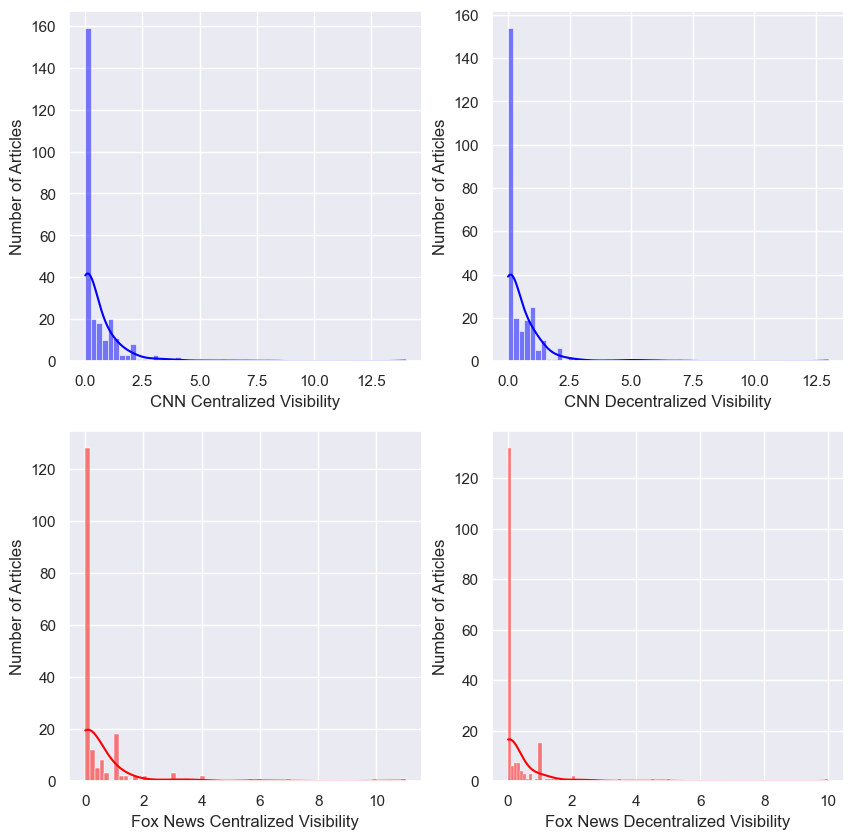

In [162]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=CNN, x="CV Score", kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_xlabel("CNN Centralized Visibility")
axs[0, 0].set_ylabel("Number of Articles")

sns.histplot(data=CNN, x="DV Score", kde=True, color="blue", ax=axs[0, 1])
axs[0, 1].set_xlabel("CNN Decentralized Visibility")
axs[0, 1].set_ylabel("Number of Articles")

sns.histplot(data=FOX, x="CV Score", kde=True, color="red", ax=axs[1, 0])
axs[1, 0].set_xlabel("Fox News Centralized Visibility")
axs[1, 0].set_ylabel("Number of Articles")

sns.histplot(data=FOX, x="DV Score", kde=True, color="red", ax=axs[1, 1])
axs[1, 1].set_xlabel("Fox News Decentralized Visibility")
axs[1, 1].set_ylabel("Number of Articles")

plt.show()


### Treatment

In [163]:
CNN2 = df[df['Outlet'] == 1]

In [164]:
FOX2 = df[df['Outlet'] == 2]

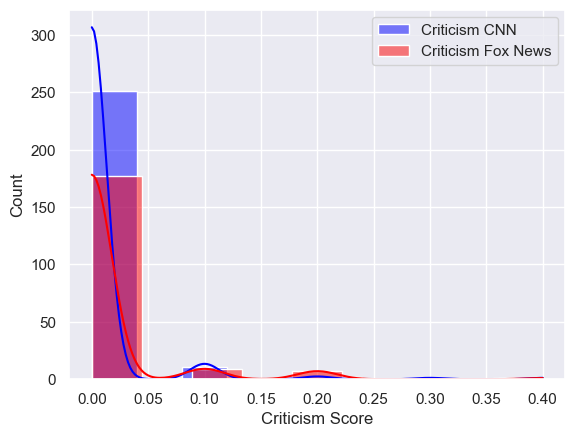

In [165]:
sns.set(style="darkgrid")

sns.histplot(data=CNN2, x="Criticism Score", color="blue", label="Criticism CNN", kde=True)
sns.histplot(data=FOX2, x="Criticism Score", color="red", label="Criticism Fox News", kde=True)

plt.legend() 
plt.show()

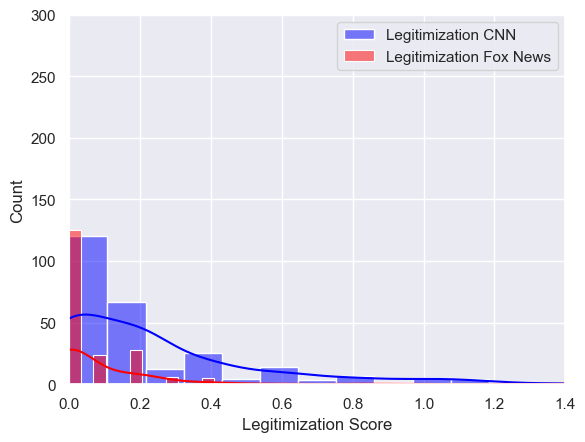

In [166]:
sns.set(style="darkgrid")

sns.histplot(data=CNN2, x="Legitimization Score", color="blue", label="Legitimization CNN", kde=True)
sns.histplot(data=FOX2, x="Legitimization Score", color="red", label="Legitimization Fox News", kde=True)

plt.xlim(0, 1.4)  
plt.ylim(0, 300)  

plt.legend() 
plt.show()